<a href="https://colab.research.google.com/github/tzsoulcap/ds-workshop-w3/blob/main/Learner_Notebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization

# The package name changed to prophet

In [1]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [2]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [3]:
df = pd.read_csv('/content/TSLA.csv')

In [ ]:
#read_csv function from pandas

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75713800
1,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
2,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
3,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
4,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
...,...,...,...,...,...,...,...
245,2023-10-13,258.899994,259.600006,250.220001,251.119995,251.119995,102073800
246,2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
247,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
248,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,206.773840,211.301400,202.147720,206.906360,206.906360,1.351459e+08
std,44.976267,45.362324,44.674599,45.045095,45.045095,4.092051e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,5.067270e+07
25%,176.367504,182.379997,172.502499,178.187496,178.187496,1.050524e+08
50%,198.234993,202.845001,192.885002,197.474998,197.474998,1.278121e+08
75%,249.542499,255.235000,244.472496,250.217502,250.217502,1.610446e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,3.065906e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [7]:
px.area(df, x='Date', y='Close')

In [8]:
px.line(df, x='Date', y='Close')

In [9]:
px.area(df, x='Date', y='Volume')

In [10]:
px.bar(df, x='Date', y='Volume')

In [11]:
px.box(df, y='Close')

# Understanding Facebook Prophet

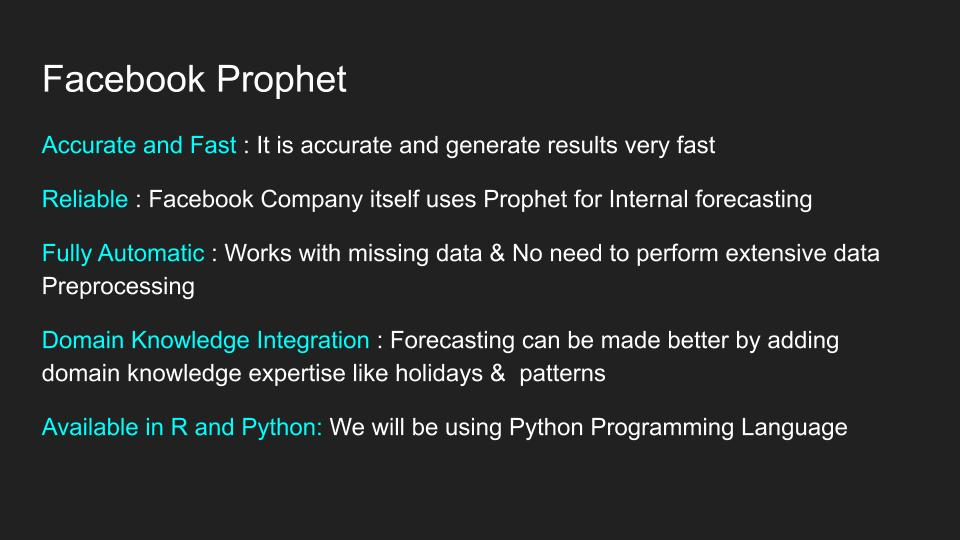

## Data Preperation

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75713800
1,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
2,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
3,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
4,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800


In [13]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns = columns)

In [14]:
ndf

,Date,Close
0,2022-10-21,214.440002
1,2022-10-24,211.250000
2,2022-10-25,222.419998
3,2022-10-26,224.639999
4,2022-10-27,225.089996
...,...,...
245,2023-10-13,251.119995
246,2023-10-16,253.919998
247,2023-10-17,254.850006
248,2023-10-18,242.679993


In [15]:
prophet_df = ndf.rename(columns = {'Date': 'ds', 'Close': 'y'})

In [27]:
prophet_df

,ds,y
0,2022-10-21,214.440002
1,2022-10-24,211.250000
2,2022-10-25,222.419998
3,2022-10-26,224.639999
4,2022-10-27,225.089996
...,...,...
245,2023-10-13,251.119995
246,2023-10-16,253.919998
247,2023-10-17,254.850006
248,2023-10-18,242.679993


## Creating Facebook Prophet Model

In [17]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmq0yuicz/na670eko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmq0yuicz/rhrbvawz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41051', 'data', 'file=/tmp/tmpmq0yuicz/na670eko.json', 'init=/tmp/tmpmq0yuicz/rhrbvawz.json', 'output', 'file=/tmp/tmpmq0yuicz/prophet_model4mxy8ytj/prophet_model-20231021032858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:28:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:28:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

##Forecasting

In [18]:
future = m.make_future_dataframe(periods=30, freq='D')
forecast = m.predict(future)


create 30 days for future

In [19]:
future

,ds
0,2022-10-21
1,2022-10-24
2,2022-10-25
3,2022-10-26
4,2022-10-27
...,...
275,2023-11-14
276,2023-11-15
277,2023-11-16
278,2023-11-17


In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-10-21,200.505514,166.526968,225.761906,200.505514,200.505514,-2.309451,-2.309451,-2.309451,-2.309451,-2.309451,-2.309451,0.0,0.0,0.0,198.196063
1,2022-10-24,198.881494,168.099917,228.814753,198.881494,198.881494,-0.853543,-0.853543,-0.853543,-0.853543,-0.853543,-0.853543,0.0,0.0,0.0,198.027951
2,2022-10-25,198.340154,164.187010,226.582608,198.340154,198.340154,-2.939659,-2.939659,-2.939659,-2.939659,-2.939659,-2.939659,0.0,0.0,0.0,195.400495
3,2022-10-26,197.798814,160.926686,225.302678,197.798814,197.798814,-3.160463,-3.160463,-3.160463,-3.160463,-3.160463,-3.160463,0.0,0.0,0.0,194.638351
4,2022-10-27,197.257474,162.591188,224.008531,197.257474,197.257474,-4.168989,-4.168989,-4.168989,-4.168989,-4.168989,-4.168989,0.0,0.0,0.0,193.088485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-11-14,268.505226,234.703651,292.664895,266.425078,270.257479,-2.939659,-2.939659,-2.939659,-2.939659,-2.939659,-2.939659,0.0,0.0,0.0,265.565567
276,2023-11-15,268.665052,234.230097,294.694277,266.358158,270.490030,-3.160463,-3.160463,-3.160463,-3.160463,-3.160463,-3.160463,0.0,0.0,0.0,265.504589
277,2023-11-16,268.824878,233.370598,293.499707,266.392379,270.777666,-4.168989,-4.168989,-4.168989,-4.168989,-4.168989,-4.168989,0.0,0.0,0.0,264.655889
278,2023-11-17,268.984704,236.237446,296.033516,266.411672,271.033197,-2.309451,-2.309451,-2.309451,-2.309451,-2.309451,-2.309451,0.0,0.0,0.0,266.675252


In [21]:
px.line(forecast, x='ds', y='yhat')

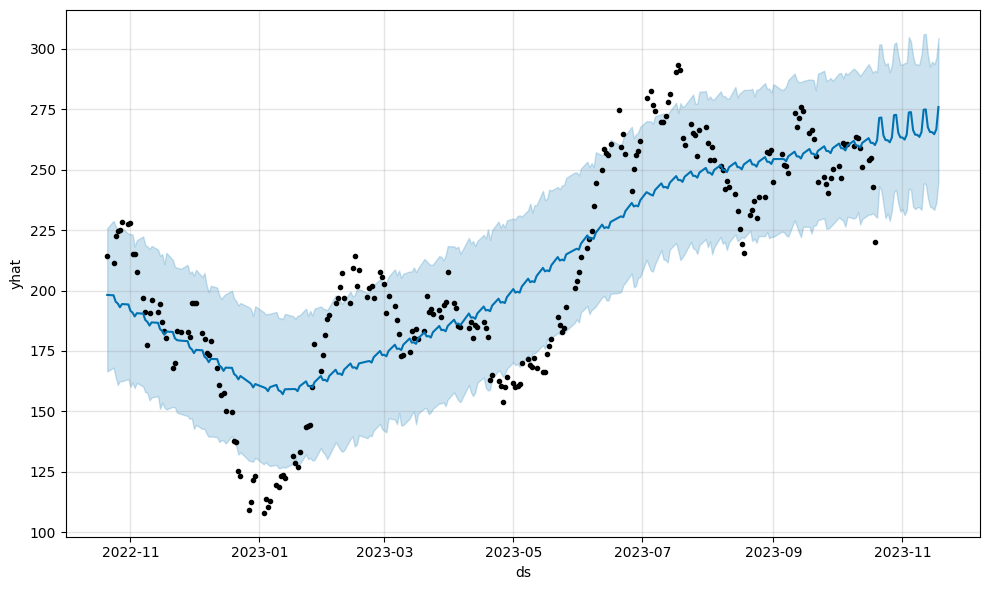

In [22]:
figure = m.plot(forecast, xlabel='ds', ylabel='yhat')

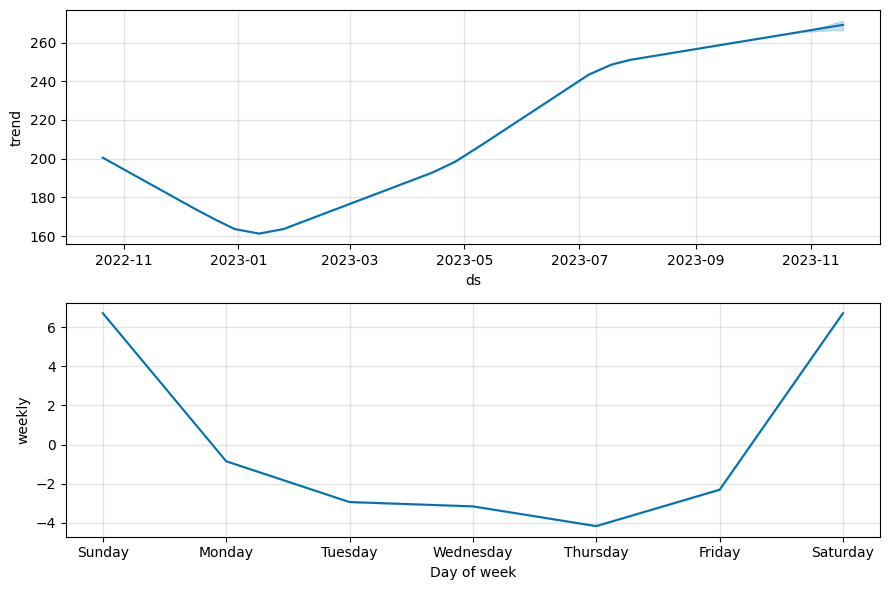

In [23]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
prophet_df

,ds,y
0,2022-10-21,214.440002
1,2022-10-24,211.250000
2,2022-10-25,222.419998
3,2022-10-26,224.639999
4,2022-10-27,225.089996
...,...,...
245,2023-10-13,251.119995
246,2023-10-16,253.919998
247,2023-10-17,254.850006
248,2023-10-18,242.679993


In [41]:
new_df = pd.concat([prophet_df,
    forecast.loc[prophet_df.shape[0]:, ['ds', 'yhat']]  \
           .rename(columns={'yhat': 'y'})]
          , axis=0).rename(columns={'ds': 'Date', 'y': 'Close'})
new_df['Date'] = pd.to_datetime(new_df['Date'].astype(str), format='%Y-%m-%d')
new_df

,Date,Close
0,2022-10-21,214.440002
1,2022-10-24,211.250000
2,2022-10-25,222.419998
3,2022-10-26,224.639999
4,2022-10-27,225.089996
...,...,...
275,2023-11-14,265.565567
276,2023-11-15,265.504589
277,2023-11-16,264.655889
278,2023-11-17,266.675252
